In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [134]:
!cat requirements.txt

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: osx-64
appnope=0.1.2=py38h50d1736_1
argon2-cffi=20.1.0=py38h5406a74_2
async_generator=1.10=py_0
attrs=20.3.0=pyhd3deb0d_0
backcall=0.2.0=pyh9f0ad1d_0
backports=1.0=py_2
backports.functools_lru_cache=1.6.1=py_0
bleach=3.3.0=pyh44b312d_0
boost-cpp=1.74.0=h43a636a_2
bzip2=1.0.8=hc929b4f_4
c-ares=1.17.1=h0d85af4_1
ca-certificates=2020.12.5=h033912b_0
certifi=2020.12.5=py38h50d1736_1
cffi=1.14.5=py38ha97d567_0
cmake=3.19.6=h641592c_0
cycler=0.10.0=py_2
dbus=1.13.6=h0c50699_1
decorator=4.4.2=py_0
defusedxml=0.7.1=pyhd8ed1ab_0
eigen=3.3.9=h926bf3e_1
entrypoints=0.3=pyhd8ed1ab_1003
expat=2.2.10=h1c7c35f_0
fenics=2019.1.0=py38h50d1736_19
fenics-dijitso=2019.1.0=py38h50d1736_19
fenics-dolfin=2019.1.0=py38h58f3e4a_19
fenics-ffc=2019.1.0=py38h50d1736_19
fenics-fiat=2019.1.0=py38h50d1736_19
fenics-libdolfin=2019.1.0=ha6bb12c_19
fenics-ufl=2019.1.0=py38h50d1736_19
freetype=2.10.4=h4cf

In [2]:
from fenics import *

In [3]:
from ufl import nabla_div
from vedo.dolfin import plot as vplot


In [108]:
tol=1e-14
def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol

# Define strain and stress

def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

def get_max_displacement(L, W, mu, rho, gamma_coef, beta, N=10):
    delta = W/L
    gamma = gamma_coef*delta**2
    lambda_ = beta
    g = gamma

    # Create mesh and define function space
    mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), N, 3, 3)
    V = VectorFunctionSpace(mesh, 'P', 1)

    bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)
    def sigma(u):
        return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

    # Define variational problem
    u = TrialFunction(V)
    d = u.geometric_dimension()  # space dimension
    v = TestFunction(V)
    f = Constant((0, 0, -rho*g))
    T = Constant((0, 0, 0))
    a = inner(sigma(u), epsilon(v))*dx
    L = dot(f, v)*dx + dot(T, v)*ds

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    # Plot solution
    #vplot(u, title='Displacement', mode='displacement')

    # Plot stress
    s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
    von_Mises = sqrt(3./2*inner(s, s))
    V = FunctionSpace(mesh, 'P', 1)
    von_Mises = project(von_Mises, V)
    #vplot(von_Mises, title='Stress intensity')

    # Compute magnitude of displacement
    u_magnitude = sqrt(dot(u, u))
    u_magnitude = project(u_magnitude, V)
    #vplot(u_magnitude, 'Displacement magnitude')
    return u_magnitude.vector().get_local().max()


In [31]:
var_range = [
    (1, 1),
    (.2, .2),
    (.1, 5.),
    (.1, 5.),
    (.1, .9),
    (.1, 5.),
]

In [32]:
def sample_vars(var_range):
    return tuple(np.random.random() * (r-l) + l for l, r in var_range)

In [34]:
sample_vars(var_range)

(1.0,
 0.2,
 3.4495741352365474,
 1.6333708210532774,
 0.6556547367851013,
 1.457233396579682)

In [41]:
!pip install tqdm

     |████████████████████████████████| 74 kB 2.1 MB/s eta 0:00:011


In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
from tqdm import notebook as tqdm

In [37]:
reg = GaussianProcessRegressor()

In [43]:
X_test = []
y_test = []
for i in tqdm.trange(100):
    variables = sample_vars(var_range)
    X_test.append(variables)
    y_test.append(get_max_displacement(*variables))

  0%|          | 0/100 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

In [ ]:
reg.

In [45]:
reg.predict(X_test, return_std=True)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [47]:
np.log(1/(2*np.pi)**2)

-3.675754132818691

In [49]:
def evaluate(reg):
    y_pred, std_pred = reg.predict(X_test, return_std=True)
    abs_error = np.mean(np.abs(y_pred - y_test))
    mean_std = np.mean(std_pred)
    log_likelihood = np.sum(np.log(1/((2*np.pi)**.5*std_pred))-((y_test - y_pred) / std_pred)**2)
    return abs_error, mean_std, log_likelihood

In [50]:
evaluate(reg)

(0.2800180135032519, 1.0, -109.47997082799608)

In [51]:
X_train = []
y_train = []
for i in tqdm.trange(100):
    variables = sample_vars(var_range)
    X_train.append(variables)
    y_train.append(get_max_displacement(*variables))

  0%|          | 0/100 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

In [67]:
for i in tqdm.trange(400):
    variables = sample_vars(var_range)
    X_train.append(variables)
    y_train.append(get_max_displacement(*variables))

  0%|          | 0/400 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

In [52]:
reg.fit(X_train[:1], y_train[:1])

GaussianProcessRegressor()

In [53]:
evaluate(reg)

(0.2725417007760234, 0.9844267762366659, -108.00170211911613)

In [55]:
reg.fit(X_train[:10], y_train[:10])

GaussianProcessRegressor()

In [68]:
results = [evaluate(GaussianProcessRegressor())]
for i in tqdm.trange(1, len(X_train)+1):
    results.append(evaluate(GaussianProcessRegressor().fit(X_train[:i], y_train[:i])))

  0%|          | 0/500 [00:00<?, ?it/s]

In [70]:
errors, stds, lls = zip(*results)

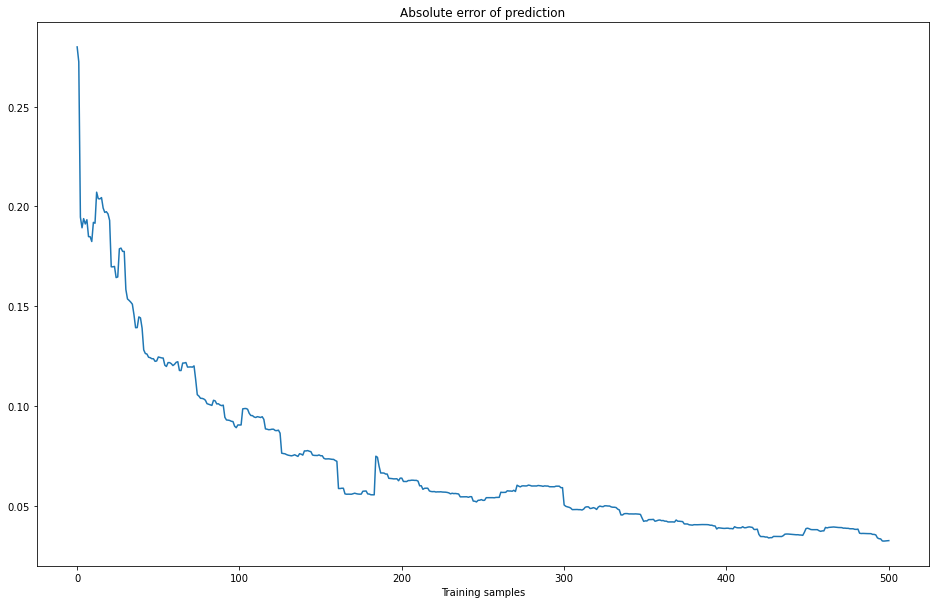

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16, 10))
ax.plot(errors)
ax.set_title('Absolute error of prediction')
ax.set_xlabel('Training samples')
fig.savefig('prj01.png')

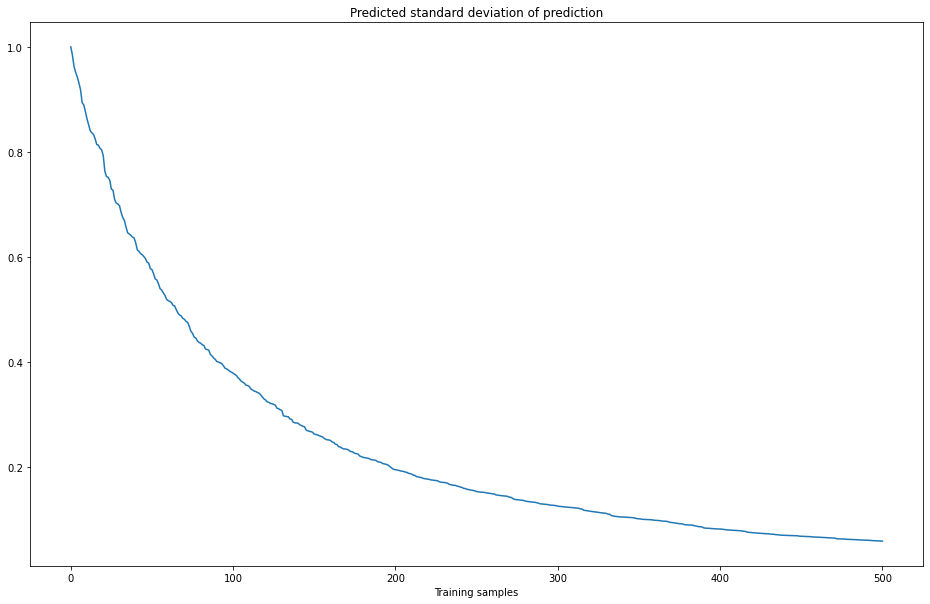

In [77]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(stds)
ax.set_title('Predicted standard deviation of prediction')
ax.set_xlabel('Training samples')
fig.savefig('prj02.png')

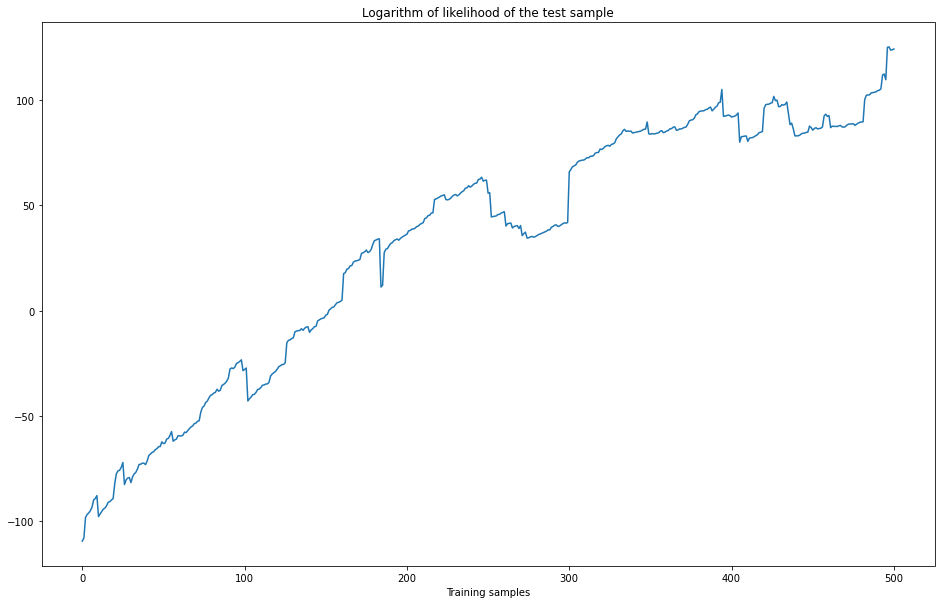

In [78]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(lls)
ax.set_title('Logarithm of likelihood of the test sample')
ax.set_xlabel('Training samples')
fig.savefig('prj03.png')

In [ ]:
reg = GaussianProcessRegressor()
results_smart = [evaluate(GaussianProcessRegressor())]
X_train_smart = []
y_train_smart = []

In [89]:

while len(y_train_smart) < 500:
    N_sample = 10
    X_new = [sample_vars(var_range) for _ in range(N_sample)]
    _, std_pred = reg.predict(X_new, return_std=True)
    idx = max(range(N_sample), key=lambda x: std_pred[x])
    variables = X_new[idx]
    X_train_smart.append(variables)
    y_train_smart.append(get_max_displacement(*variables))
    reg = GaussianProcessRegressor().fit(X_train_smart, y_train_smart)
    results_smart.append(evaluate(reg))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [93]:
errors_smart, stds_smart, lls_smart = zip(*results_smart)

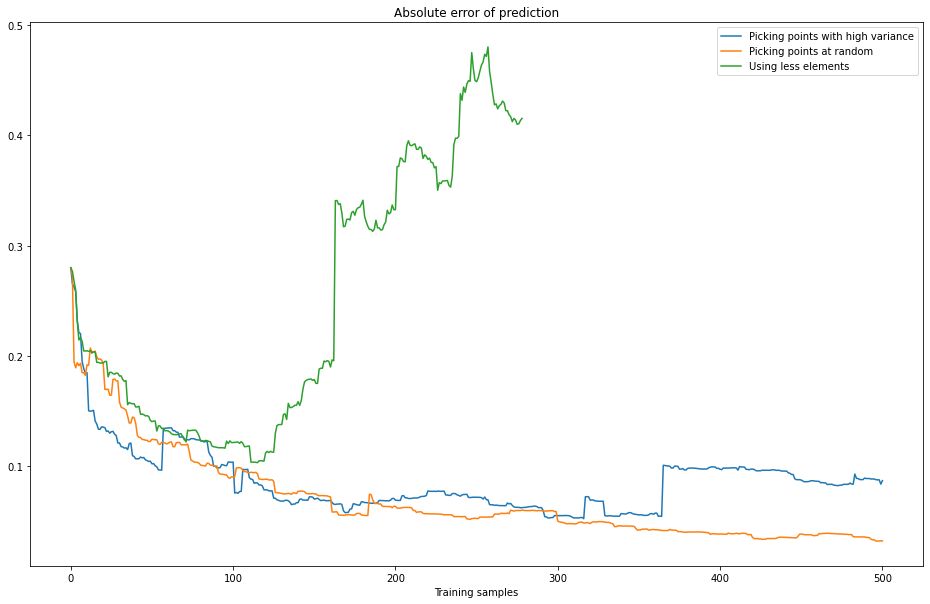

In [127]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(errors_smart, label='Picking points with high variance')
ax.plot(errors, label='Picking points at random')
ax.plot(errors2, label='Using less elements')
ax.set_title('Absolute error of prediction')
ax.set_xlabel('Training samples')
ax.legend()
fig.savefig('prj_ae.png')

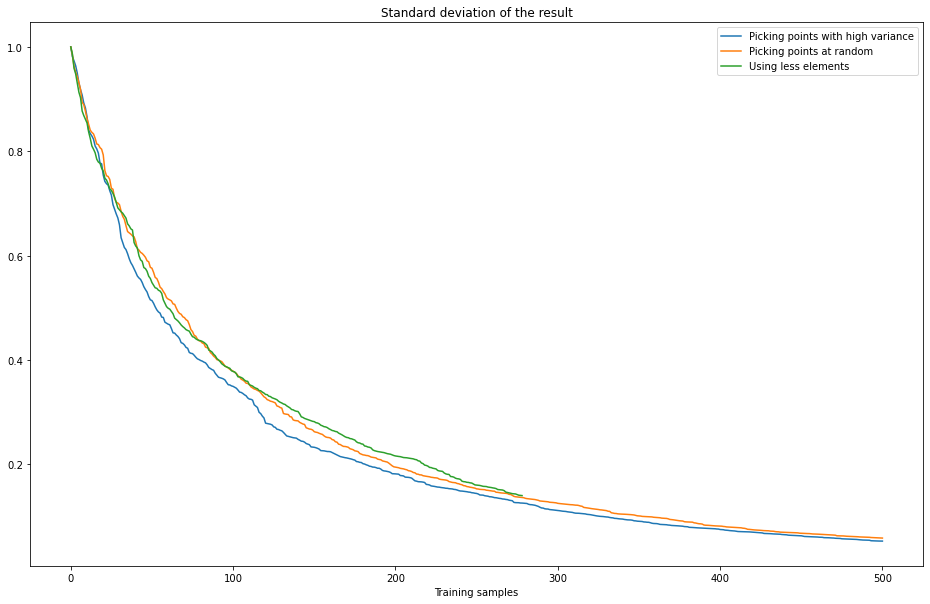

In [131]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(stds_smart, label='Picking points with high variance')
ax.plot(stds, label='Picking points at random')
ax.plot(stds2, label='Using less elements')
ax.set_title('Standard deviation of the result')
ax.set_xlabel('Training samples')
ax.legend()
fig.savefig('prj_std.png')

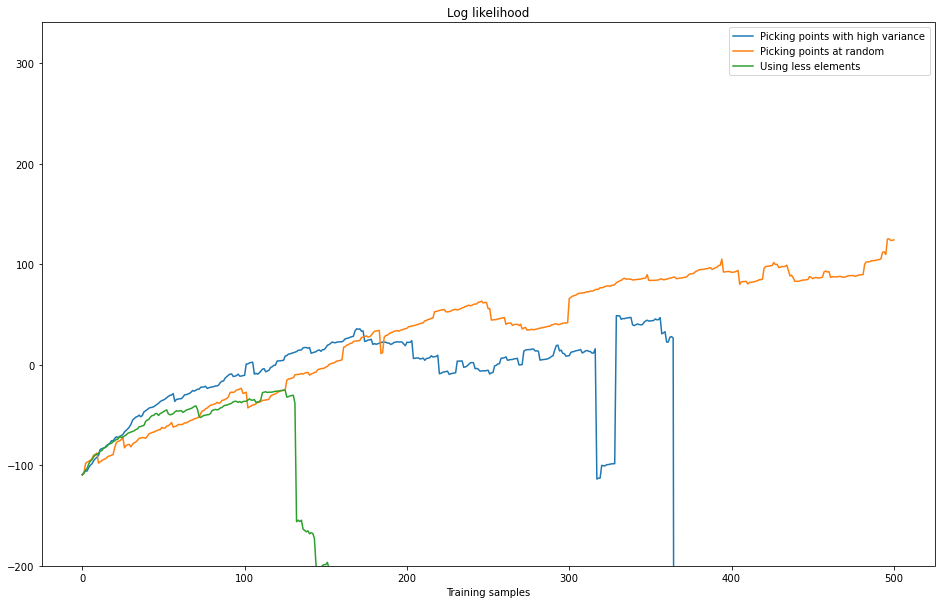

In [132]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(lls_smart, label='Picking points with high variance')
ax.plot(lls, label='Picking points at random')
ax.plot(lls2, label='Using less elements')
ax.set_title('Log likelihood')
ax.set_xlabel('Training samples')
ax.legend()
ax.set_ylim(-200)
fig.savefig('prj_ll.png')

In [109]:
X_train2 = []
y_train2 = []
for i in tqdm.trange(100):
    variables = sample_vars(var_range)
    X_train2.append(variables)
    y_train2.append(get_max_displacement(*variables, N=5))

  0%|          | 0/100 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

In [123]:
while len(y_train2) < 400:
    variables = sample_vars(var_range)
    X_train2.append(variables)
    y_train2.append(get_max_displacement(*variables, N=5))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

KeyboardInterrupt: 

In [125]:
results2 = [evaluate(GaussianProcessRegressor())]
for i in tqdm.trange(1, len(y_train2)+1):
    results2.append(evaluate(GaussianProcessRegressor().fit(X_train2[:i], y_train2[:i])))

  0%|          | 0/278 [00:00<?, ?it/s]

In [126]:
errors2, stds2, lls2 = zip(*results2)

In [119]:
results2

[(0.2800180135032519, 1.0, -109.47997082799608),
 (0.27684310050434535, 0.9863806895510134, -108.04039360854159),
 (0.2677625585821848, 0.9590125914695831, -104.71411349586583),
 (0.2599738636524118, 0.9483802089977162, -103.02915463838593),
 (0.2311663763830579, 0.9309480957413576, -98.48230608517657),
 (0.21452581687444525, 0.9131108802803954, -95.78474529475163),
 (0.21662704549779097, 0.9026285401062444, -94.59525851981788),
 (0.21329973832679783, 0.8770840211957747, -91.4727262857255),
 (0.20462274521470403, 0.8684490463004417, -89.84299690213803),
 (0.20453829086675146, 0.861200174835532, -88.96823461064781),
 (0.20473163205485814, 0.8543054189409689, -88.1853121250291),
 (0.20412065470474822, 0.8370987977940244, -85.97667216004312),
 (0.20484582947961155, 0.8245267605056198, -85.4677484618778),
 (0.202646889405636, 0.8099604047757193, -83.22464694766877),
 (0.20371259690052956, 0.80389768370055, -82.37529833538258),
 (0.20356526702070582, 0.7970731013646306, -81.55564451819734),